In [1]:
import numpy as np
import statsmodels.tsa as tsa
from utils.utils import get_data_sub_paths

from matplotlib import rcParams
import os

os.environ['NUMEXPR_MAX_THREADS'] = str(os.cpu_count())
rcParams["font.family"] = "STIXGeneral"

From: [Machine Learning Mastery: How to Create an ARIMA Model for Time Series Forecasting in Python
](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)

- **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I**: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA**: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.



The parameters of the ARIMA model are defined as follows:

- **p**: The number of lag observations included in the model, also called the lag order.
- **d**: The number of times that the raw observations are differenced, also called the degree of differencing.
- **q**: The size of the moving average window, also called the order of moving average.

In [2]:
import pandas as pd

In [3]:
from scipy.ndimage import gaussian_filter1d
from sklearn.metrics import mean_absolute_error
from utils.data_processing import auto_corr
from utils.filters import GaussianFilter1D

In [4]:
from utils.utils import load_total_counts
from utils.data_processing import normalize_df
from utils.plots import plot

folder_names = [i for i in get_data_sub_paths() if i.startswith('Tota')]
print(folder_names)

df = load_total_counts(folder_names[0])
df['TOTAL'] = df.sum(axis=1)
df = normalize_df(df)

['Totals_T24H_2001-01-01_2019-01-01_LAT41.645_42.022_LON-87.934_-87.525']


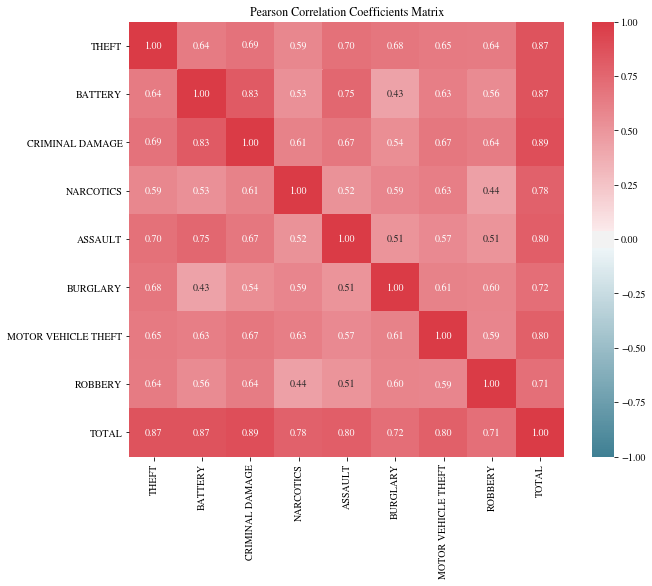

In [5]:
from utils.plots import plot_corr
plot_corr(df.corr())

In [11]:
# plot(**{col.title(): df[col] for col in df.columns})
a = df.TOTAL

f1d = GaussianFilter1D(sigma=3)
# f1d.fit(a)
b = f1d.transform(a)
plot(a=a,b=b)

In [60]:
np.abs(d.values) > 3 

array([ True, False, False, ..., False, False,  True])

In [65]:
import plotly.express as px
d = (b-a)
d = d - d.mean()
d = d/d.std()

outliers = pd.DataFrame({
    "Outlier": np.abs(d.values) > 2,
    "Residuals": d.values,
}, index=d.index)

fig = px.scatter(outliers,y='Residuals',color='Outlier',marginal_y='histogram')
fig.update_layout(
    font=dict(family="STIXGeneral"),
    title='Residuals over Time',
    title_x=0.5,
    yaxis_title='Residuals',
    xaxis_title='Date',
)

In [19]:
from statsmodels.tsa.arima_model import ARIMA
 
model = ARIMA(df.TOTAL, order=(5,1,0), freq=)
model_fit = model.fit(disp=0)

/home/bernard/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/home/bernard/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



In [33]:
df.TOTAL.index

DatetimeIndex(['2001-01-01', '2001-01-02', '2001-01-03', '2001-01-04',
               '2001-01-05', '2001-01-06', '2001-01-07', '2001-01-08',
               '2001-01-09', '2001-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', length=6574, freq=None)